In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import functools
import matplotlib.pyplot as plt
import traceback 
import contextlib
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [26]:
bladder_cancer = pd.read_csv('bladder_cancer.csv')

x = pd.DataFrame(bladder_cancer, columns=['Amp_1MHz', 'Phase_1MHz', 'Amp_500kHz', 'Phase_500kHz', 'Amp_100kHz', 'Phase_100kHz', 'Amp_50kHz', 'Phase_50kHz', 'Amp_10kHz', 'Phase_10kHz'])

y = pd.DataFrame(bladder_cancer, columns=['Label'])

x_mean = x.mean()
x_std = x.std()
x = (x-x_mean)/x_std

x_data, x_test, y_data, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=1) 
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
x_train

array([[-0.70212259,  0.87691791,  1.3089513 , ...,  0.29837007,
         0.38672978,  0.01241453],
       [-2.75649426,  1.09072906, -0.89399574, ...,  0.17062017,
        -0.58008862,  0.68077064],
       [ 0.24532515, -0.38633226, -0.58649158, ...,  0.37028141,
        -1.44227513,  1.10491147],
       ...,
       [-1.18210733, -0.99929518, -1.63580168, ..., -0.66027891,
         1.69482415,  1.15727325],
       [ 1.39072348, -0.85021045, -2.14404835, ...,  0.35723112,
         0.05855178,  0.78050842],
       [ 1.37015955,  0.36935711,  0.63271442, ...,  0.22917919,
        -1.16423879,  0.0284987 ]])

In [27]:
model = tf.keras.Sequential([
   
   layers.Dense(16, activation='relu'),
   layers.Dense(32, activation='relu'),
   layers.Dense(1, activation='sigmoid')

])

model.compile(loss= 'binary_crossentropy',
                optimizer = tf.optimizers.Adam(),
                metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=40, batch_size=10, validation_data=(x_val, y_val), verbose=1)

Epoch 1/40
17/17 [==============================] - 0s 7ms/step - loss: 0.7501 - accuracy: 0.5385 - val_loss: 0.7320 - val_accuracy: 0.5349
Epoch 2/40
17/17 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.5740 - val_loss: 0.7050 - val_accuracy: 0.5814
Epoch 3/40
17/17 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6036 - val_loss: 0.6786 - val_accuracy: 0.6279
Epoch 4/40
17/17 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6272 - val_loss: 0.6556 - val_accuracy: 0.6279
Epoch 5/40
17/17 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.7219 - val_loss: 0.6325 - val_accuracy: 0.7209
Epoch 6/40
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.7574 - val_loss: 0.6097 - val_accuracy: 0.7209
Epoch 7/40
17/17 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.7811 - val_loss: 0.5857 - val_accuracy: 0.7209
Epoch 8/40
17/17 [==

In [29]:
model.evaluate(x_train,  y_train, verbose=2)
model.evaluate(x_val,  y_val, verbose=2)
model.evaluate(x_test,  y_test, verbose=2)

prediction = model.predict(x_test[:1])
print(prediction)

6/6 - 0s - loss: 0.1222 - accuracy: 0.9586 - 14ms/epoch - 2ms/step
2/2 - 0s - loss: 0.3313 - accuracy: 0.8605 - 12ms/epoch - 6ms/step
1/1 - 0s - loss: 0.4309 - accuracy: 0.7917 - 11ms/epoch - 11ms/step
[[0.5871109]]


In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

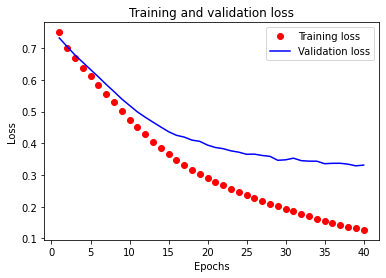

In [31]:


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'ro', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

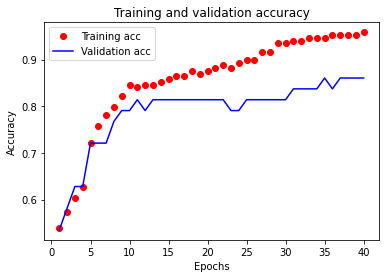

In [32]:
plt.clf()  

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()